In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense 

In [4]:
df=pd.read_csv("/content/drive/MyDrive/Deep Learning/DL_Mam/data.csv")

In [5]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

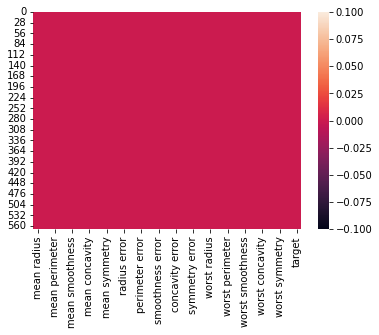

In [7]:
sns.heatmap(df.isnull())

In [8]:
plt.rcParams["figure.figsize"] = (10,5) #set the size of graphe
plt.rcParams["figure.dpi"] = 150 # 

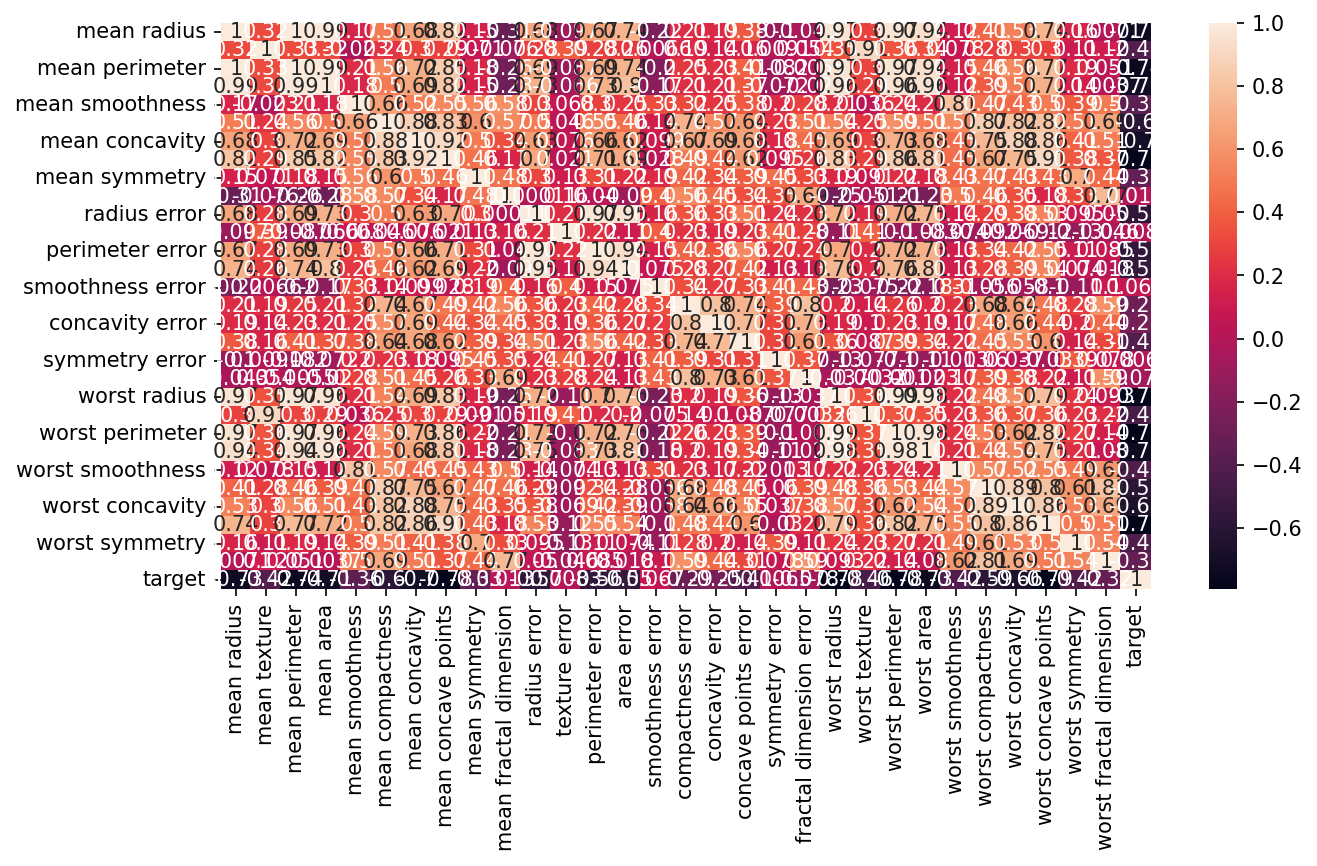

In [9]:
sns.heatmap(df.corr(), annot=True) 

In [10]:
df["target"].value_counts() 

1    357
0    212
Name: target, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


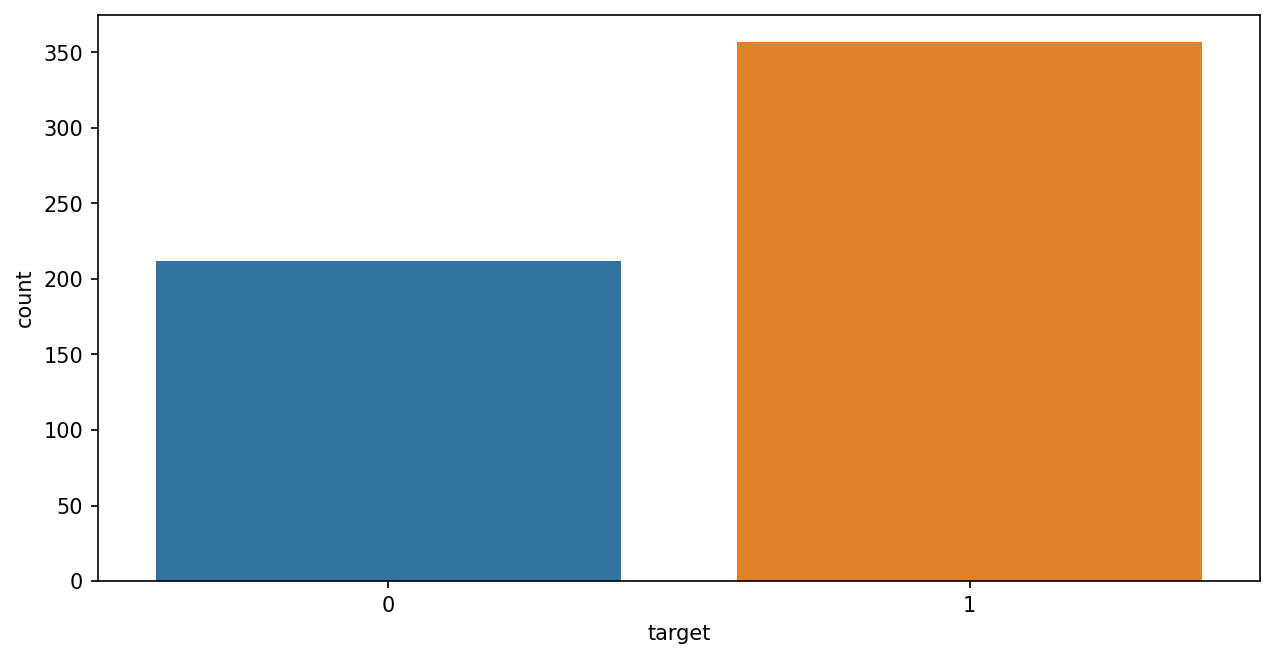

In [11]:
sns.countplot(df["target"]) 

In [12]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1] 

In [15]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.3,random_state=1)

In [13]:
from sklearn.preprocessing import StandardScaler 

In [14]:
sc=StandardScaler()   

In [16]:
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [17]:
ann = Sequential()

In [18]:
ann.add(Dense(units=30, activation="relu"))
ann.add(Dense(units=15, activation="relu"))

ann.add(Dense(units=1,activation="sigmoid"))

In [19]:
ann.compile(optimizer = "adam" ,loss="binary_crossentropy")

In [20]:
ann.fit(xtrain,ytrain,epochs=600, validation_data= (xtest,ytest))

Epoch 1/600
13/13 [==============================] - 1s 16ms/step - loss: 0.4960 - val_loss: 0.4393
Epoch 2/600
13/13 [==============================] - 0s 5ms/step - loss: 0.3718 - val_loss: 0.3464
Epoch 3/600
13/13 [==============================] - 0s 6ms/step - loss: 0.2896 - val_loss: 0.2804
Epoch 4/600
13/13 [==============================] - 0s 4ms/step - loss: 0.2292 - val_loss: 0.2328
Epoch 5/600
13/13 [==============================] - 0s 5ms/step - loss: 0.1861 - val_loss: 0.1985
Epoch 6/600
13/13 [==============================] - 0s 4ms/step - loss: 0.1550 - val_loss: 0.1750
Epoch 7/600
13/13 [==============================] - 0s 5ms/step - loss: 0.1315 - val_loss: 0.1572
Epoch 8/600
13/13 [==============================] - 0s 4ms/step - loss: 0.1139 - val_loss: 0.1438
Epoch 9/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0999 - val_loss: 0.1335
Epoch 10/600
13/13 [==============================] - 0s 8ms/step - loss: 0.0890 - val_loss: 0.1257
Epoch 11

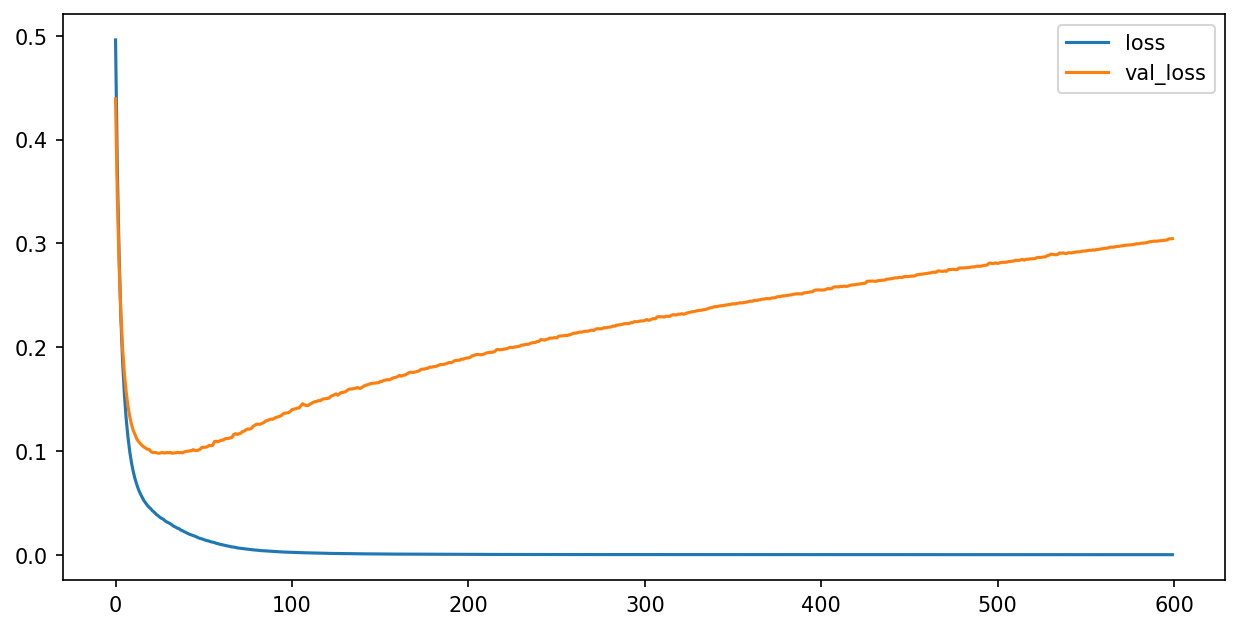

In [21]:
lossdf = pd.DataFrame(ann.history.history)
lossdf.plot()

In [22]:
ann.evaluate(xtrain,ytrain) #

13/13 [==============================] - 0s 2ms/step - loss: 5.4280e-06


5.428010808827821e-06

In [23]:
ann.evaluate(xtest,ytest) #

6/6 [==============================] - 0s 2ms/step - loss: 0.3046


0.3045876622200012

In [25]:
from tensorflow.keras.callbacks import EarlyStopping 

early = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience=20)

In [26]:
ann=Sequential()

ann.add(Dense(units=30, activation = "relu"))
ann.add(Dense(units=15, activation = "relu"))

ann.add(Dense(units=1, activation = "sigmoid"))

ann.compile(optimizer="adam", loss = "binary_crossentropy")

In [27]:
ann.fit(xtrain,ytrain, epochs =500, validation_data = (xtest,ytest))

Epoch 1/500
13/13 [==============================] - 1s 13ms/step - loss: 0.5222 - val_loss: 0.4371
Epoch 2/500
13/13 [==============================] - 0s 4ms/step - loss: 0.3441 - val_loss: 0.3177
Epoch 3/500
13/13 [==============================] - 0s 4ms/step - loss: 0.2425 - val_loss: 0.2520
Epoch 4/500
13/13 [==============================] - 0s 10ms/step - loss: 0.1890 - val_loss: 0.2108
Epoch 5/500
13/13 [==============================] - 0s 15ms/step - loss: 0.1552 - val_loss: 0.1840
Epoch 6/500
13/13 [==============================] - 0s 15ms/step - loss: 0.1339 - val_loss: 0.1652
Epoch 7/500
13/13 [==============================] - 0s 11ms/step - loss: 0.1187 - val_loss: 0.1511
Epoch 8/500
13/13 [==============================] - 0s 6ms/step - loss: 0.1074 - val_loss: 0.1394
Epoch 9/500
13/13 [==============================] - 0s 4ms/step - loss: 0.0979 - val_loss: 0.1307
Epoch 10/500
13/13 [==============================] - 0s 6ms/step - loss: 0.0906 - val_loss: 0.1243
Epoc

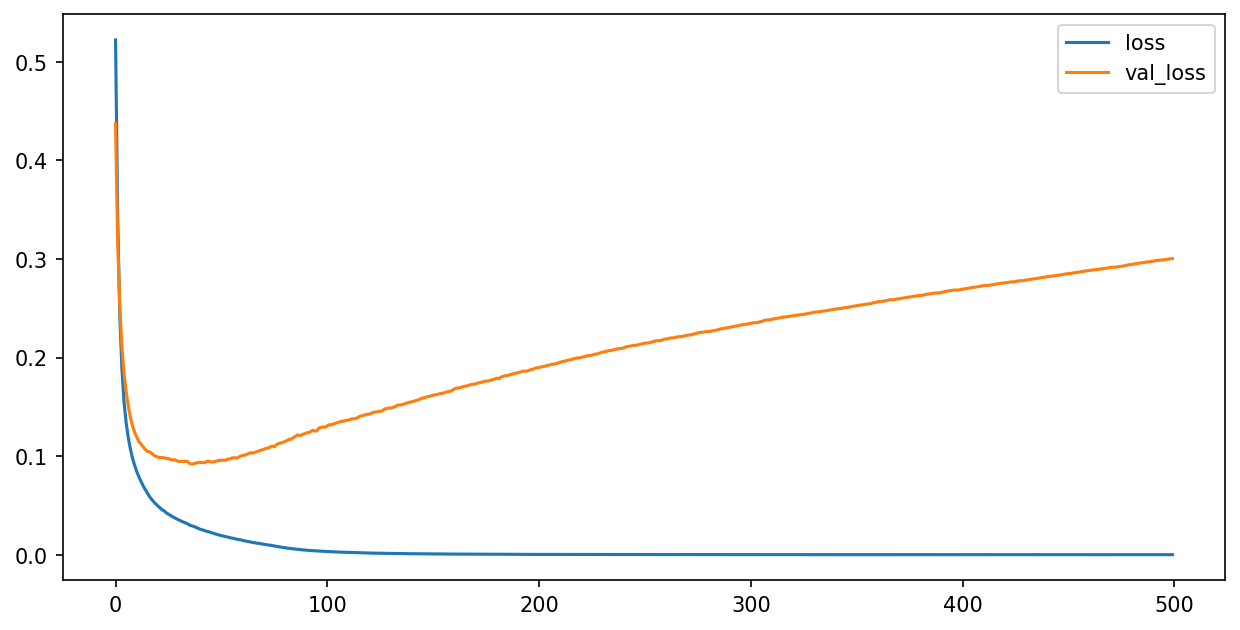

In [28]:
ldf = pd.DataFrame(ann.history.history)
ldf.plot()

In [29]:
ann.evaluate(xtrain,ytrain) 

13/13 [==============================] - 0s 2ms/step - loss: 8.7844e-06


8.78435548656853e-06

In [30]:
ann.evaluate(xtest,ytest) 

6/6 [==============================] - 0s 5ms/step - loss: 0.3003


0.30031606554985046

In [31]:
from tensorflow.keras.layers import Dropout

In [32]:
ann=Sequential()

ann.add(Dense(units=30, activation="relu"))
ann.add(Dropout(rate=0.5))

ann.add(Dense(units=15, activation="relu"))
ann.add(Dropout(rate=0.1))

ann.add(Dense(units=1, activation="sigmoid"))

ann.compile(optimizer="adam", loss = "binary_crossentropy")

ann.fit(xtrain,ytrain,epochs=600, validation_data=(xtest,ytest), callbacks=[early])

Epoch 1/600
13/13 [==============================] - 1s 29ms/step - loss: 0.7254 - val_loss: 0.5318
Epoch 2/600
13/13 [==============================] - 0s 15ms/step - loss: 0.5439 - val_loss: 0.4214
Epoch 3/600
13/13 [==============================] - 0s 6ms/step - loss: 0.4270 - val_loss: 0.3576
Epoch 4/600
13/13 [==============================] - 0s 6ms/step - loss: 0.3611 - val_loss: 0.3112
Epoch 5/600
13/13 [==============================] - 0s 11ms/step - loss: 0.3199 - val_loss: 0.2709
Epoch 6/600
13/13 [==============================] - 0s 17ms/step - loss: 0.2717 - val_loss: 0.2368
Epoch 7/600
13/13 [==============================] - 0s 13ms/step - loss: 0.2389 - val_loss: 0.2068
Epoch 8/600
13/13 [==============================] - 0s 14ms/step - loss: 0.2150 - val_loss: 0.1839
Epoch 9/600
13/13 [==============================] - 0s 15ms/step - loss: 0.1822 - val_loss: 0.1662
Epoch 10/600
13/13 [==============================] - 0s 8ms/step - loss: 0.1743 - val_loss: 0.1506
Ep

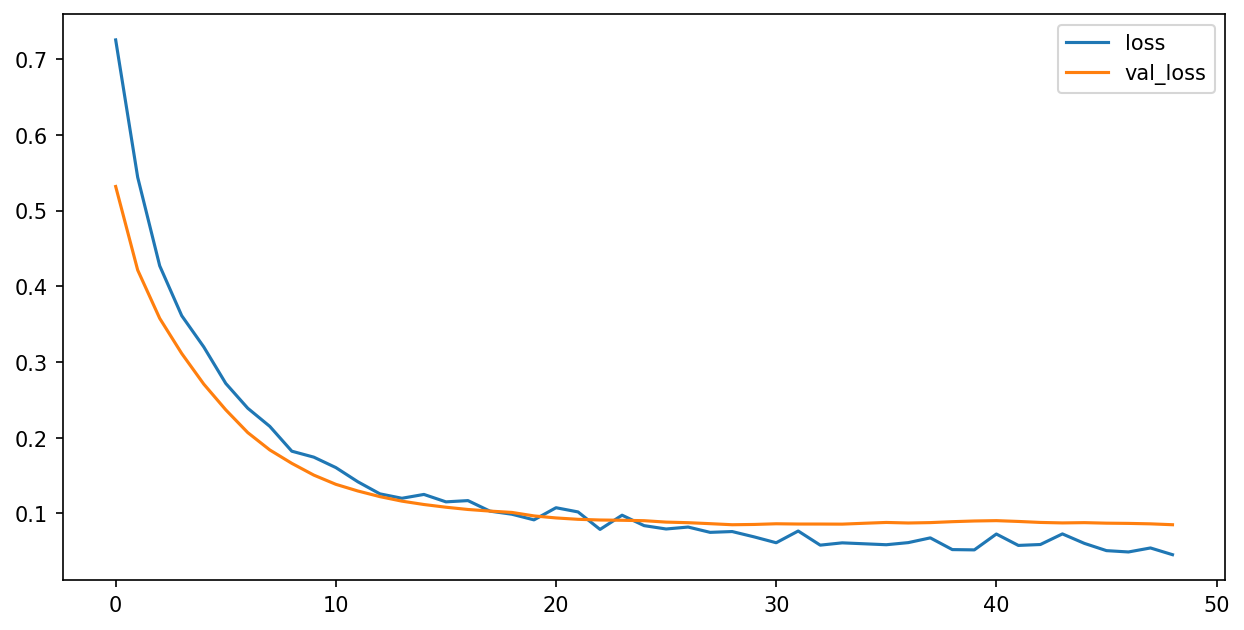

In [33]:
ddf = pd.DataFrame(ann.history.history)
ddf.plot()

In [36]:
ann.evaluate(xtrain,ytrain)

13/13 [==============================] - 0s 2ms/step - loss: 0.0319


0.03185892850160599

In [37]:
ann.evaluate(xtest,ytest)

6/6 [==============================] - 0s 4ms/step - loss: 0.0851


0.08511631190776825

In [38]:
ypred=ann.predict(xtest)

In [39]:
from sklearn.metrics import classification_report

In [40]:
print(classification_report(ytest,ypred.round()))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94        63
           1       0.95      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

